Linear Regression Health Costs Calculator

This for Freecode camp certificate in Machine Learning wiht Python

Problem description
Copied and modfied from this Google Colab link

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.

pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.

Create a model and train it with the train_dataset. Run the final cell in this notebook to check your model. The final cell will use the unseen test_dataset to check how well the model generalizes.

To pass the challenge, model.evaluate must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.



# Importing necessary libraries 

## Data Preprocessing

In [3]:
!wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [16]:
# Import data from a local environment, you can put your own local path to import the dataset
df = pd.read_csv("....\insurance.csv")
df.head()
df.shape

(1338, 7)

In [17]:

# Generate dummies for sex
df = pd.concat([df,pd.get_dummies(df['sex'],prefix="sex")],axis=1)
df.drop('sex', axis=1, inplace=True)

# Generate dummies for smoker
df = pd.concat([df,pd.get_dummies(df['smoker'],prefix="smoker")],axis=1)
df.drop('smoker', axis=1, inplace=True)

# Generate dummies for region
df = pd.concat([df,pd.get_dummies(df['region'],prefix="region")],axis=1)
df.drop('region', axis=1, inplace=True)
df


,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [18]:
x_columns = df.columns.drop('expenses')
x = df[x_columns].values
y = df['expenses'].values
     


In [19]:
df.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [23]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)
x.shape[1]

11

In [24]:
# Build the neural network for the model

model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

#compile our model to produce precise outcomes 

model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=0, epochs=50)


9/9 - 0s - loss: 7021.9019 - mean_absolute_error: 7021.9019 - mean_squared_error: 169544848.0000 - 33ms/epoch - 4ms/step
Testing set Mean Abs Error: 7021.90 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 3ms/step


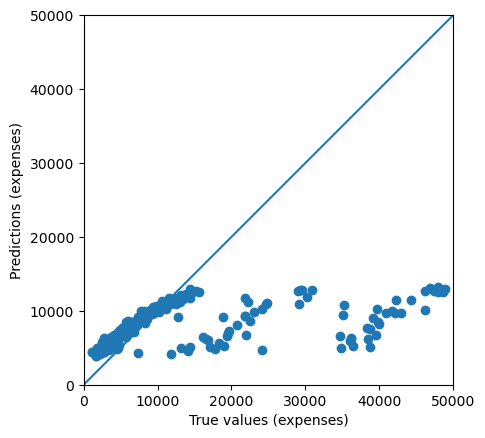

In [25]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


# Conclusion 

The model can be trained further with epochs reaching above 500 and that will ultimately achieve lower loss values and a lower mean absolute error that would let the model predict with precision the expenses based on the input features. 